Hola **María**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
--
</div>

**PROYECTO SHOWZ**

Realizaremos un **análisis de la estructura** de los datos, para conocer, los nombres de la columnas, sus cantidades y que tipos de datos contienen. Posteriormente **prepararemos** los datos, limpiando la calidad de los mismos, así como requeriremos conocer, si existen datos ausente y solucionar los problemas de la data detectados. Si es necesario se aumentará columnas necesarias. Una vez con la información lista, procederemos a realizar distintos **análisis**, sean estos utilizados agrupaciones o gráficas, que nos permita contestar las preguntas del negocio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente presentación del notebook, siempre es muy buena práctica usar celdas markdown para los títulos y también para dejar tus comentarios
</div>

**ACCESO A LOS DATOS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
visitas = pd.read_csv('/datasets/visits_log_us.csv')
ordenes = pd.read_csv('/datasets/orders_log_us.csv')
costos = pd.read_csv('/datasets/costs_us.csv')

**DATOS DE VISITAS**

***ANÁLISIS DE LA ESTRUCTURA***

In [3]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visitas.sample(10)

,Device,End Ts,Source Id,Start Ts,Uid
285507,desktop,2018-01-22 15:52:00,2,2018-01-22 15:37:00,7046737606684150807
321863,desktop,2017-10-17 16:32:00,10,2017-10-17 16:21:00,11655060642431609635
62552,desktop,2017-11-22 16:11:00,1,2017-11-22 16:02:00,17030528792926543083
215669,desktop,2018-04-05 17:43:00,9,2018-04-05 17:43:00,3814827056394484073
151322,desktop,2017-10-05 18:53:00,5,2017-10-05 18:53:00,4033516565783449737
291506,desktop,2017-10-18 18:47:00,3,2017-10-18 18:45:00,936061457076456002
341463,touch,2017-12-13 18:04:00,4,2017-12-13 18:03:00,1168728431842261576
2918,touch,2018-03-04 21:44:00,4,2018-03-04 21:34:00,16066124779113506503
66150,touch,2018-02-23 23:11:00,3,2018-02-23 23:07:00,909336293291631064
186738,desktop,2018-02-27 19:59:00,1,2018-02-27 19:34:00,5788288753283437818


In [5]:
visitas.duplicated().sum( )

0

El DataFrame visitas cuenta con 5 columnas, que obtuvimos aplicando el método **(.info)** vemos que no hay valores ausentes, pues cada columna cuenta con el mismo número de filas. Así mismo, tenemos 3 columnas que son necesario convertir su tipo, para los futuros análisis, que son **End Ts**, **Start Ts**. Con el método **(.sample)** obtenemos aleatoriamente filas para visualizar su estructura y como está la data. Adicionalmente, aplicamos el método **(.duplicated)** para conocer si hay filas con duplicados explícitos.

***LIMPIEZA DE DATOS***

In [6]:
visitas['End Ts'] = pd.to_datetime(visitas['End Ts'])
visitas['Start Ts'] = pd.to_datetime(visitas['Start Ts'])

In [7]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [8]:
visitas = visitas.rename(columns={'Source Id': 'source_id'})
visitas = visitas.rename(columns={'End Ts': 'end_ts'})
visitas = visitas.rename(columns={'Start Ts': 'start_ts'})
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Aplicamos el método **(.to_datetime)** para transformar las columnas **End Ts**, **Start Ts** a tipo fecha, así como corregimos los nombres de las columnas a los formatos correspondientes, con el método **(.rename)**. Analizando los campos de todas las tablas, vemos que la tabla de costos, contiene la columna **source_id**, columna que también posee la tabla de visitas, por lo que con el método **(.rename)** se unificó los nombres. Posteriormente, aplicamos nuevamente el método **(.info)** para validar la transformación.

**DATOS DE PEDIDOS**

***ANÁLISIS DE LA ESTRUCTURA***

In [9]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
ordenes.sample(10)

,Buy Ts,Revenue,Uid
10775,2017-10-05 11:44:00,1.10,3499967677428839335
651,2017-06-06 20:33:00,3.12,8080173634967775202
6207,2017-08-28 14:30:00,7.33,13888745432979765063
17176,2017-11-12 18:32:00,2.22,12282918141281811120
39282,2018-03-10 12:50:00,5.25,10019725652270376988
583,2017-06-06 14:42:00,0.61,15036383982305854706
15937,2017-11-03 12:29:00,2.44,8842268596612296499
14974,2017-10-27 23:48:00,0.83,458046032361337415
23557,2017-12-12 12:49:00,0.12,8759588290474993698
34616,2018-02-13 18:44:00,5.38,7365917381491715084


In [11]:
ordenes.duplicated().sum( )

0

El DataFrame órdenes cuenta con 3 columnas, que obtuvimos aplicando el método **(.info)** vemos que no hay valores ausentes, pues cada columna cuenta con el mismo número de filas. Así mismo, tenemos 1 columna que es necesario convertir su tipo, para los futuros análisis, que es **Buy Ts**. Con el método **(.sample)** obtenemos aleatoriamente filas para visualizar su estructura y como está la data. Adicionalmente, aplicamos el método **(.duplicated)** para conocer si hay filas con duplicados explícitos.

***LIMPIEZA DE DATOS***

In [12]:
ordenes['Buy Ts'] = pd.to_datetime(ordenes['Buy Ts'])
ordenes = ordenes.rename(columns={'Buy Ts': 'buy_ts'})

In [13]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Aplicamos el método **(.to_datetime)** para transformar la columna **Buy Ts** a tipo fecha así como corregimos el nombre de la columna en el formato respectivo, con el método **(.rename)** Posteriormente, aplicamos nuevamente el método **(.info)** para validar la transformación.

**DATOS DE GASTOS DE MARKETING**

***ANÁLISIS DE LA ESTRUCTURA***

In [14]:
costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [15]:
costos.sample(10)

,source_id,dt,costs
922,3,2017-12-14,679.05
1311,4,2018-01-09,66.62
472,2,2017-09-18,103.36
2262,10,2017-08-23,8.73
2177,9,2018-05-30,23.57
274,1,2018-03-02,76.10
2315,10,2017-10-15,24.30
2117,9,2018-03-29,13.96
1276,4,2017-12-05,788.03
657,2,2018-03-22,142.55


In [16]:
costos.duplicated().sum( )

0

El DataFrame costos cuenta con 3 columnas, que obtuvimos aplicando el método **(.info)** vemos que no hay valores ausentes, pues cada columna cuenta con el mismo número de filas. Así mismo, tenemos 1 columna que es necesario convertir su tipo, para los futuros análisis, que es **dt**. Con el método **(.sample)** obtenemos aleatoriamente filas para visualizar su estructura y como está la data. Adicionalmente, aplicamos el método **(.duplicated)** para conocer si hay filas con duplicados explícitos.

***LIMPIEZA DE DATOS***

In [17]:
costos['dt'] = pd.to_datetime(costos['dt'])

In [18]:
costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Aplicamos el método **(.to_datetime)** para transformar la columna **dt** a tipo fecha. Posteriormente, aplicamos nuevamente el método **(.info)** para validar la transformación.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el análisis inicial de tus dataset, siempre es importante primero revisar la calidad de los datos y el tipo de los mismos antes de pasar a cualquier análisis
</div>

**INFORMES Y MÉTRICAS**

Realizaremos la inclusión de columnas correspondientes a tiempo, separando fecha, mes año, para poder tener los cohortes por tiempo y posteriormente las agrupaciones, gráficas que conteste las preguntas del negocio.

**VISITAS**

In [19]:
visitas['session_year'] = visitas['start_ts'].dt.isocalendar().year
visitas['session_month'] = visitas['start_ts'].dt.month
visitas['session_week'] = visitas['start_ts'].dt.isocalendar().week
visitas['session_date'] = visitas['start_ts'].dt.date

**Periodo de Análisis**

In [20]:
visitas['session_date'] = pd.to_datetime(visitas['session_date'])
min_date = visitas['session_date'].min()
max_date = visitas['session_date'].max()
print(min_date)
print(max_date)

2017-06-01 00:00:00
2018-05-31 00:00:00


Es importante conocer el periodo que estamos analizando las visitas, calculamos tanto el máximo como el mínimo de la fecha de inicio de sesión con los métodos **min()** y **max()**, y obtenemos que el periodo de análisis es de **1 año** iniciando en junio del 2017 y terminando en mayo del 2018.

**Volumen de Visitas**

In [21]:
visitas_per_month = visitas.groupby('session_month')['Uid'].count().reset_index()

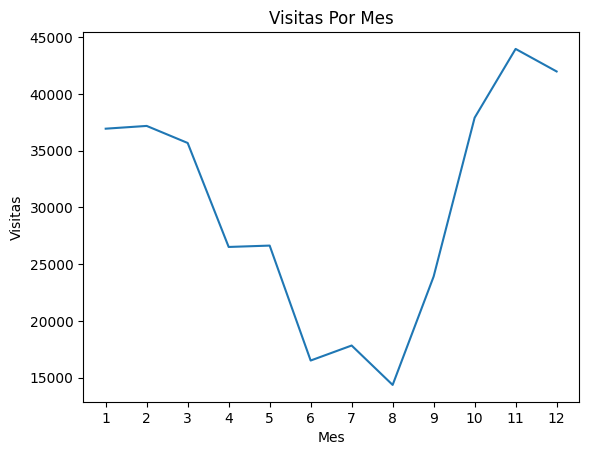

In [22]:
sns.lineplot(x='session_month', y='Uid', data=visitas_per_month, ci=None)
plt.title('Visitas Por Mes')
plt.xlabel('Mes')
plt.ylabel('Visitas')
plt.xticks(visitas_per_month['session_month'].unique())
plt.show()

In [23]:
print(f"Número de visitas máximo: {visitas_per_month['Uid'].max():,.2f}")

Número de visitas máximo: 43,969.00


En el periodo analizado, vemos que el mes que más visitas hubo fue el mes **Noviembre, con 43,969 visitas**

In [24]:
visitas_per_dispositivo = visitas.groupby('Device')['Uid'].count().reset_index()

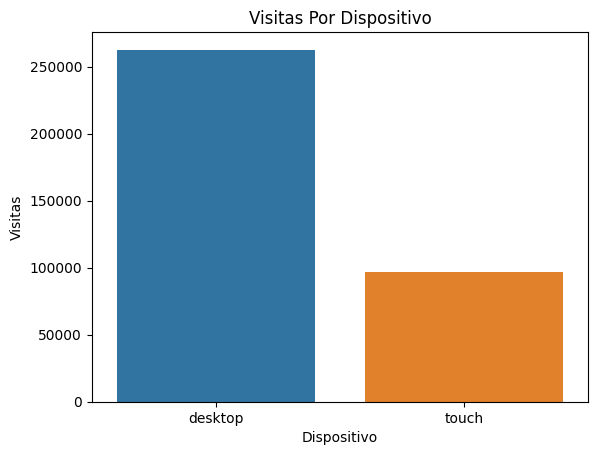

In [25]:
sns.barplot(x='Device', y='Uid', data=visitas_per_dispositivo)
plt.title('Visitas Por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Visitas')
plt.show()

En dispositivo que más utilizan las personas es el **desktop** para ingresar a la plataforma analizada.

In [26]:
visitas_per_anuncio = visitas.groupby('source_id')['Uid'].count().reset_index()

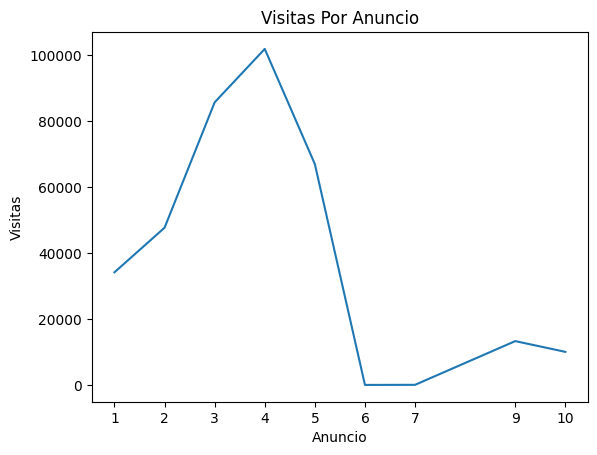

In [27]:
sns.lineplot(x='source_id', y='Uid', data=visitas_per_anuncio, ci=None)
plt.title('Visitas Por Anuncio')
plt.xlabel('Anuncio')
plt.ylabel('Visitas')
plt.xticks(visitas_per_anuncio['source_id'].unique())
plt.show()

In [28]:
print(f"Número de visitas máximo: {visitas_per_anuncio['Uid'].max():,.2f}")

Número de visitas máximo: 101,794.00


Hubo más visitas por el anuncio de **4** al ingresar a la plataforma analizada, con 101,794 visitas.

**Métricas de Usuarios**

In [29]:
MAU = (visitas.groupby(['session_year','session_month']).agg({'Uid': 'nunique'}).mean())
WAU = (visitas.groupby(['session_year','session_week']).agg({'Uid': 'nunique'}).mean())
DAU = visitas.groupby('session_date').agg({'Uid': 'nunique'}).mean()
print(f'# de personas que visitan por día:{DAU.item():,.2f}')
print(f'# de personas que visitan por semana:{WAU.item():,.2f}')
print(f'# de personas que visitan por mes:{MAU.item():,.2f}')

# de personas que visitan por día:907.99
# de personas que visitan por semana:5,716.25
# de personas que visitan por mes:23,228.42


**Métricas de Usuarios (DAU, WAU, MAU)**
La página de Showz cuenta con una audiencia activa diaria (DAU) de **908 personas**. Semanalmente, la audiencia activa semanal (WAU) asciende a **5,716 personas**, y mensualmente, una audiencia activa mensual (MAU) alcanza las **23,228 personas**. Estos indicadores de actividad se obtuvieron utilizando las capacidades de **datetime**, específicamente el método **.dt.isocalendar**.

In [30]:
sessions_per_day = visitas.groupby(['session_date']).size()
average_sessions_per_day = sessions_per_day.mean()
print(f'# sesiones por día: {average_sessions_per_day:,.2f}')

# sesiones por día: 987.36


In [31]:
visitas['session_duration_min'] = ((visitas['end_ts']- visitas['start_ts']).dt.seconds) / 60
average_sessions = visitas['session_duration_min'].median()
print(f'Duración de cada sesión: {average_sessions:,.2f} minutes')

Duración de cada sesión: 5.00 minutes


**Métricas de Sesión**
Registramos un promedio de **987 sesiones por día**. Este cálculo se realizó agrupando los registros diarios con el método **.groupby()** y determinando el número de entradas **.size()** por cada día. La duración promedio de cada sesión es de **5 minutos**. Para obtener esta métrica, calculamos la diferencia entre la fecha de cierre **end_ts** y la fecha de inicio de sesión **start_ts**, extrajimos la diferencia en segundos con el método **.dt.seconds**, y luego la convertimos a minutos, para el promedio utilizamos la **(.median)**, entendiendo que el giro de estar en una sesión es que puede haber tiempos atípicos.

Para futuros Análisis es importante obtener la fecha de la primera visita y el tiempo que trascurre entre la primera visita y las siguientes sesiones.

In [32]:
first_activity_date = visitas.groupby(['Uid'])['session_date'].min().reset_index()
first_activity_date.columns = ['Uid', 'first_date']

In [33]:
visitas_with_first_date = visitas.merge(first_activity_date, on='Uid', how='left')

In [34]:
visitas_with_first_date['session_first_week'] = pd.to_datetime(visitas_with_first_date['first_date']).dt.isocalendar().week.astype(int)

In [35]:
visitas_with_first_date['life_time'] = (visitas_with_first_date['session_date'] - visitas_with_first_date['first_date']).dt.days
print(f"Tiempo entre la sesión de un usuario y la primera sesión : {visitas_with_first_date['life_time'].mean():,.2f} dias")

Tiempo entre la sesión de un usuario y la primera sesión : 30.12 dias


In [36]:
visitas_per_users = visitas_with_first_date.groupby('Uid')['Device'].count().reset_index()
visitas_per_users = visitas_per_users.rename(columns={'Device': 'visitas_count'})

In [37]:
more_one_visit = visitas_per_users[visitas_per_users['visitas_count']!=1]
frecuencia = more_one_visit['visitas_count'].mean()
print(f'Los usuarios regresan, en el periodo de 1 año: {frecuencia:,.2f} veces')

Los usuarios regresan, en el periodo de 1 año: 3.52 veces


**Frecuencia de Retorno de Usuarios**
La frecuencia con la que los usuarios regresan a la página es de **3.52 veces al año** (durante el período de análisis). Esta cifra se obtuvo al agrupar el número de visitas por usuario único y, posteriormente, calculando el promedio **.mean()** de los usuarios que realizaron más de una visita durante el año. 

El tiempo que transcurre de una sesión, a la primera sesión, es de **30 días**, hay que considerar que un usuario visitan la página 3.52 veces al año, por lo que este tiempo es de una sesión del usuario, comparándola con su primera sesión en la plataforma de análisis, independiente de que número de sesión es.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el análisis realizado, cada cálculo tiene su respectiva interpretación lo cual deja un proceso de análisis bastante claro
</div>

**VENTAS**

**Datos Generales de las Ventas**

In [38]:
total_ventas = ordenes['Revenue'].sum()
print(f'el total de ventas es: {total_ventas:,.2f}')

el total de ventas es: 252,057.20


In [39]:
total_pedidos = ordenes['Uid'].count()
print(f'el total de pedidos es: {total_pedidos:,.2f}')

el total de pedidos es: 50,415.00


Se ha logrado una venta total de **252,057**, impulsada por un volumen de **50,415 pedidos**.

Vamos a unir los 2 Dataframe considerando que requerimos saber su primera visita versus la fecha de compra.

In [40]:
visitas_para_merge = (visitas_with_first_date.groupby('Uid')['first_date']).min().reset_index()

In [41]:
ordenes_with_visitas = ordenes.merge(visitas_para_merge, on = 'Uid', how = 'left')

Requerimos saber el mes, semana, fecha que se realizó la compra, para los posteriores análisis.

In [42]:
ordenes_with_visitas['pedido_year'] = ordenes_with_visitas['buy_ts'].dt.isocalendar().year
ordenes_with_visitas['pedido_month'] = ordenes_with_visitas['buy_ts'].dt.month
ordenes_with_visitas['pedido_week'] = ordenes_with_visitas['buy_ts'].dt.isocalendar().week
ordenes_with_visitas['pedido_date'] = ordenes_with_visitas['buy_ts'].dt.date

In [43]:
ordenes_with_visitas['first_date'] = pd.to_datetime(ordenes_with_visitas['first_date'])

In [44]:
ordenes_with_visitas['first_year'] = ordenes_with_visitas['first_date'].dt.isocalendar().year
ordenes_with_visitas['first_month'] = ordenes_with_visitas['first_date'].dt.month
ordenes_with_visitas['first_week'] = ordenes_with_visitas['first_date'].dt.isocalendar().week
ordenes_with_visitas['first_date'] = ordenes_with_visitas['first_date'].dt.date

**Conversión de compra**

In [45]:
ordenes_with_visitas['lifetime_days_buy'] = (ordenes_with_visitas['pedido_date'] - ordenes_with_visitas['first_date']).dt.days

In [46]:
month_life_buy = ordenes_with_visitas.groupby(['first_year', 'first_month']).agg(
    promedio_lifetime_days_buy=('lifetime_days_buy', 'mean'),
    conteo_uid_unicos=('Uid', 'nunique')
).reset_index()

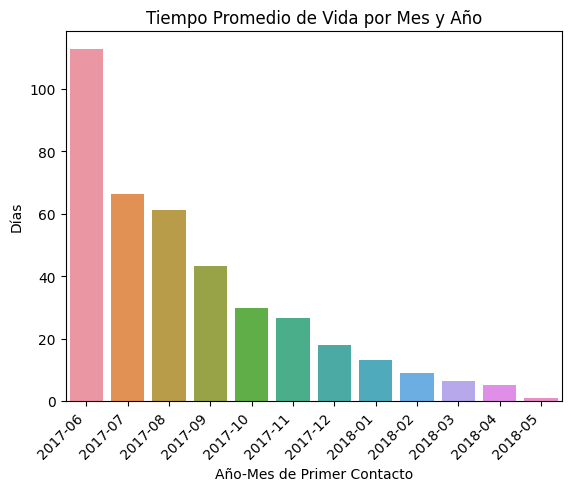

In [47]:
month_life_buy['anio_mes'] = month_life_buy['first_year'].astype(str) + '-' + month_life_buy['first_month'].astype(str).str.zfill(2)
month_life_buy = month_life_buy.sort_values(by=['first_year', 'first_month']).reset_index(drop=True)
sns.barplot(x='anio_mes', y='promedio_lifetime_days_buy', data=month_life_buy)
plt.title('Tiempo Promedio de Vida por Mes y Año')
plt.xlabel('Año-Mes de Primer Contacto')
plt.ylabel('Días')
plt.xticks(rotation=45, ha='right')
plt.show()

Hemos realizado un análisis de **cohortes estratégico**, agrupando a nuestros clientes por el **mes en que realizaron su primer contacto**. Este enfoque nos permite correlacionar directamente nuestras iniciativas de marketing con la velocidad de conversión a compra. El patrón que emerge de nuestros datos es prometedor pues observamos una notable reducción en el tiempo de conversión a medida que transcurren los meses. Esto indica que las acciones de marketing a lo largo del tiempo están rindiendo frutos, empujando a los usuarios a la compra de manera más eficiente y en un lapso significativamente menor.

**Pedidos por Mes**

In [48]:
count_pedidos = ordenes_with_visitas.groupby(['pedido_year', 'pedido_month']).agg(conteo_pedidos=('Uid', 'count'), promedio_revenue=('Revenue', 'mean'), uid_unicos = ('Uid', 'nunique')
).reset_index()

In [49]:
average_per_month_pedidos = count_pedidos['conteo_pedidos'].median()
print(f'# de pedidos por mes: {average_per_month_pedidos:,.2f}')

# de pedidos por mes: 4,346.00


In [50]:
tamanio_compra = ordenes['Revenue'].median()
print(f'el monto por compra es: {tamanio_compra:,.2f}')

el monto por compra es: 2.50


In [51]:
income_per_uid = (ordenes_with_visitas.groupby('Uid')['Revenue'].sum()).reset_index()
LTV = income_per_uid['Revenue'].median()
print(f'Cada Cliente trae: {LTV:,.2f}')

Cada Cliente trae: 3.05


**Volumen de Pedidos Consistente**: Registramos un promedio de **4,346 pedidos**. Un volumen que le permitirá al negocio establecer una capacidad operativa adecuada.

**Valor Promedio por Pedido**: Cada pedido tiene un monto de compra promedio de **$2.5**.

**Valor por Cliente**: En promedio, cada cliente contribuye con **$3.05**.

**MARKETING**

In [52]:
costos['gastomk_year'] = costos['dt'].dt.isocalendar().year
costos['gastomk_month'] = costos['dt'].dt.month
costos['gastomk_week'] = costos['dt'].dt.isocalendar().week
costos['gastomk_date'] = costos['dt'].dt.date

**Datos Generales de los Gastos de Marketing**

In [53]:
total_costos = costos['costs'].sum()
print(f'el costo total de Marketing: {total_costos:,.2f}')

el costo total de Marketing: 329,131.62


**Cohortes de Gastos de Marketing**

In [54]:
cohorte_costos_source = costos.groupby('source_id')['costs'].sum().reset_index()

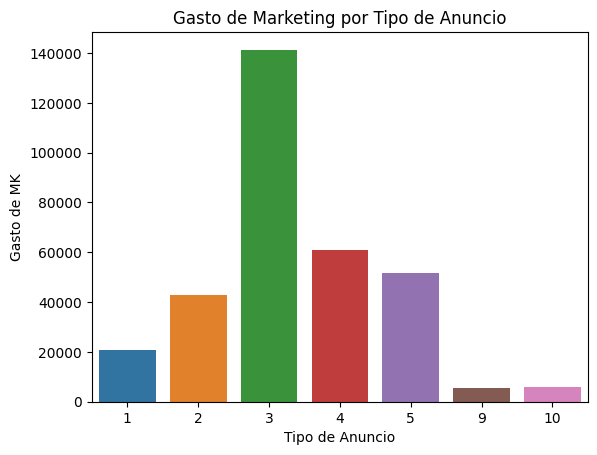

In [55]:
sns.barplot(x='source_id', y='costs', data=cohorte_costos_source)
plt.title('Gasto de Marketing por Tipo de Anuncio')
plt.xlabel('Tipo de Anuncio')
plt.ylabel('Gasto de MK')
plt.show()

Hemos llevado a cabo un análisis de **cohortes** para evaluar la distribución de nuestros gastos en marketing, categorizándolos por el tipo de anuncio utilizado. Nuestro análisis revela una clara concentración de la inversión en el **Tipo de Anuncio 3**. Esto indica que una porción significativa de nuestro presupuesto de marketing se ha asignado a esta categoría específica.

In [56]:
cohorte_costos_time = costos.groupby(['gastomk_year','gastomk_month'])['costs'].sum().reset_index()

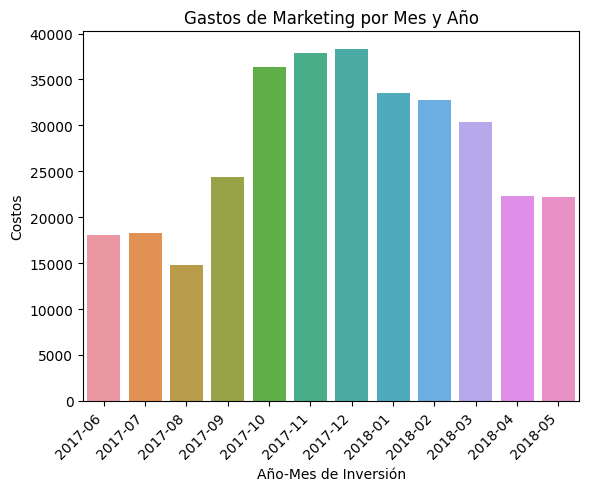

In [57]:
cohorte_costos_time['anio_mes'] = cohorte_costos_time['gastomk_year'].astype(str) + '-' + cohorte_costos_time['gastomk_month'].astype(str).str.zfill(2)
cohorte_costos_time = cohorte_costos_time.sort_values(by=['gastomk_year', 'gastomk_month']).reset_index(drop=True)
sns.barplot(x='anio_mes', y='costs', data=cohorte_costos_time)
plt.title('Gastos de Marketing por Mes y Año')
plt.xlabel('Año-Mes de Inversión')
plt.ylabel('Costos')
plt.xticks(rotation=45, ha='right')
plt.show()

In [58]:
total_gastomk = cohorte_costos_time['costs'].mean()
print(f'el costo por mes: {total_gastomk:,.2f}')

el costo por mes: 27,427.63


A pesar de que **diciembre** ha sido el mes con la **mayor inversión en marketing**, nuestros datos de **conversión** revelan que este mes **no presenta** el tiempo de conversión **más bajo**.Este hallazgo es crucial, ya que sugiere que la relación entre el volumen de inversión en marketing y la rapidez de la conversión **no es directamente proporcional**. Es decir, una mayor inversión no se traduce automáticamente en una conversión más veloz. Tenemos que la inversión por mes de marketing es de **27,427.63.

**Costos de Adquisición**

In [59]:
average_per_month_uid_unicos = count_pedidos['conteo_pedidos'].median()
print(f'# de clientes únicos por mes: {average_per_month_uid_unicos:,.2f}')

# de clientes únicos por mes: 4,346.00


In [60]:
usuarios_per_fuente = (visitas.groupby('source_id')['Uid'].nunique()).reset_index()
merge_source = usuarios_per_fuente.merge(cohorte_costos_source, on='source_id', how='outer')
merge_source_filtered = merge_source.dropna(subset=['costs']).copy()
merge_source_filtered['CAC'] = merge_source_filtered['costs']/merge_source_filtered['Uid']
merge_source_filtered

,source_id,Uid,costs,CAC
0,1,18999,20833.27,1.096546
1,2,26245,42806.04,1.631017
2,3,74756,141321.63,1.890439
3,4,83525,61073.60,0.731201
4,5,56974,51757.10,0.908434
7,9,9264,5517.49,0.595584
8,10,8067,5822.49,0.721766


In [61]:
adq_per_fuente = (merge_source_filtered.groupby('source_id')['CAC'].sum()).reset_index()

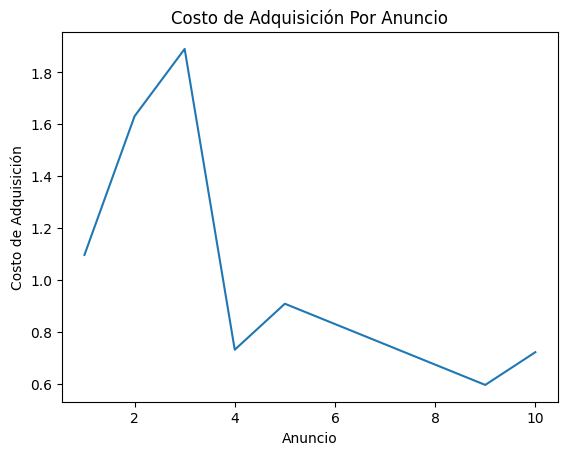

In [62]:
sns.lineplot(x='source_id', y='CAC', data=adq_per_fuente)
plt.title('Costo de Adquisición Por Anuncio')
plt.xlabel('Anuncio')
plt.ylabel('Costo de Adquisición')
plt.show()

Nuestro análisis inicial sobre la inversión en publicidad por tipo de anuncio reveló que, que el **Tipo de Anuncio 3** concentró la mayor parte de nuestro gasto en marketing, una inversión elevada no se traduce automáticamente en la adquisición **más eficiente de usuarios**. Hemos identificado que, a pesar de la significativa inversión en el Tipo de Anuncio 3, su **Costo de Adquisición de Cliente (CAC)** es elevado. Esto significa que, aunque estemos atrayendo usuarios, el costo por adquirir cada uno de ellos a través de este canal es considerable, lo que pone en tela de juicio su rentabilidad.

In [63]:
ROMI = (total_ventas - total_costos)/total_costos * 100
print(f'el ROMI es: {ROMI:,.2f}%')

el ROMI es: -23.42%


Hemos calculado un Retorno de la Inversión en Marketing **(ROMI) de -23.42%**. Esta cifra es un claro indicador de que nuestras campañas de marketing no solo no están siendo rentables, sino que están **generando pérdidas**.

Identificamos que el **Tipo de Anuncio 4** representa nuestra oportunidad más prometedora. Este tipo de anuncio ha demostrado un costo de adquisición por usuario **significativamente bajo** y, al mismo tiempo, es el anuncio que ha atraído al **mayor volumen de usuarios**. Esto lo posiciona como el canal más eficiente y escalable para la adquisición rentable de clientes. Se recomienda asignar un mayor presupuesto y recursos a este tipo de anuncio para maximizar su impacto.

Nuestros análisis de cohortes demuestran que, a lo largo del tiempo, hemos logrado una reducción notable en el tiempo promedio de **conversión**. Esta mejora progresiva es un testimonio de la efectividad de en las estrategias de marketing y ventas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

En general tienes un muy buen proceso de análisis María, cada gráfica y cálculo tiene su respectiva interpretación lo cual deja un proceso de análisis súper claro para cuando alguien quiera repasar tus proyectos.

Muy buen trabajo, saludos!
</div>